January 10, 2024

The following code is used to plot out a Wind Power Generation dataset and predict future Power output in different locations

Kaggle Dataset Link: https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting

In [1]:
import process as p

import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
zf = zipfile.ZipFile("archive.zip")
zf.namelist()

['Location1.csv',
 'Location2.csv',
 'Location3.csv',
 'Location4.csv',
 'readme.txt']

In [3]:
filePath = 'archive.zip'
filePrefix = 'Location'

dict_df_data = p.import_csv_file(filePath, filePrefix)



In [4]:
dict_df_data = p.normal(dict_df_data)

In [5]:
###Setting the date column
dict_df_data = p.set_Date(dict_df_data)

In [6]:
dict_df_data_avg = p.mean(dict_df_data)
dict_df_data_median = p.median(dict_df_data)


In [7]:
dict_df_prophet_avg = p.prophet_setup(dict_df_data_avg, 'Time', 'Power')
dict_df_prophet_median = p.prophet_setup(dict_df_data_median,'Time', 'Power')

In [8]:
###Based on syntax for quick start, this would be "m"

dict_df_prophet_avg_fit = p.prophet_library(dict_df_prophet_avg)
dict_df_prophet_median_fit = p.prophet_library(dict_df_prophet_median)

14:21:18 - cmdstanpy - INFO - Chain [1] start processing
14:21:19 - cmdstanpy - INFO - Chain [1] done processing
14:21:19 - cmdstanpy - INFO - Chain [1] start processing
14:21:19 - cmdstanpy - INFO - Chain [1] done processing
14:21:19 - cmdstanpy - INFO - Chain [1] start processing
14:21:19 - cmdstanpy - INFO - Chain [1] done processing
14:21:19 - cmdstanpy - INFO - Chain [1] start processing
14:21:19 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
dict_df_prophet_avg_fit_future = p.prophet_future(dict_df_prophet_avg_fit)
dict_df_prophet_median_fit_future = p.prophet_future(dict_df_prophet_median_fit)

In [10]:
dict_df_prophet_avg_forecast = p.prophet_forecast(dict_df_prophet_avg_fit, dict_df_prophet_avg_fit_future)
dict_df_prophet_median_forecast = p.prophet_forecast(dict_df_prophet_median_fit, dict_df_prophet_median_fit_future)


C:\Users\heroa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\heroa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\heroa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Lo

<Figure size 640x480 with 0 Axes>

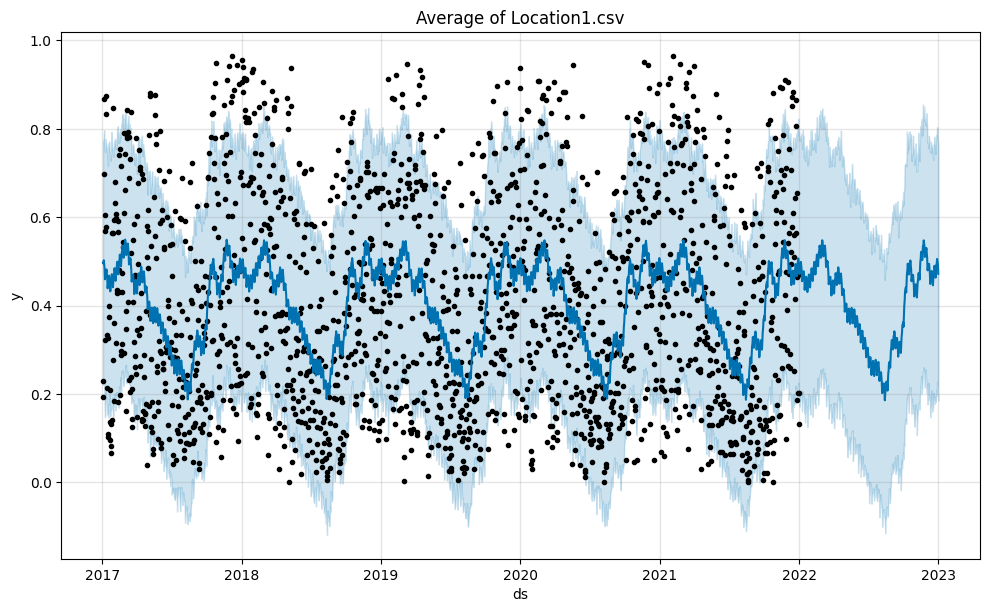

<Figure size 640x480 with 0 Axes>

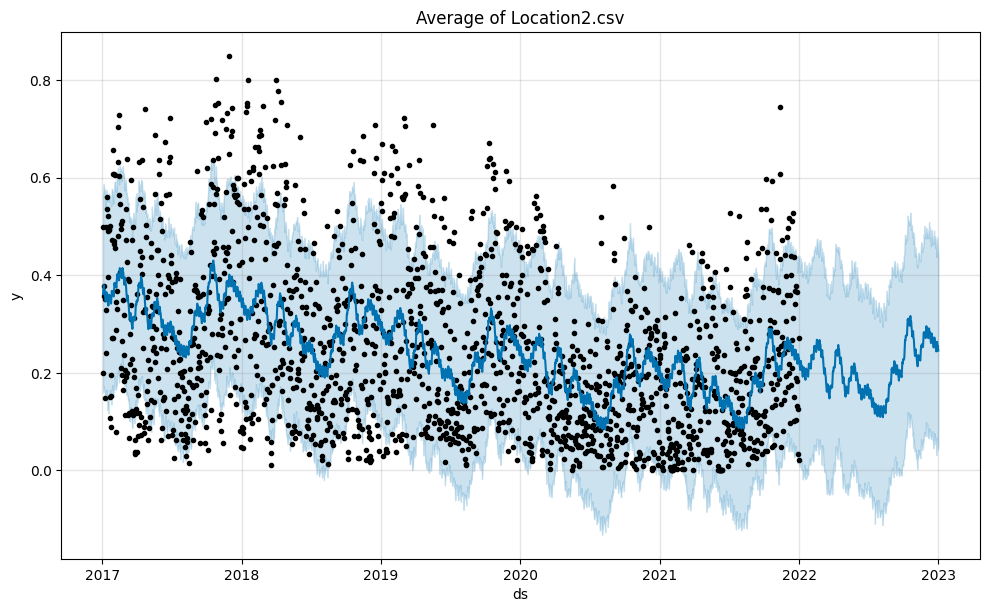

<Figure size 640x480 with 0 Axes>

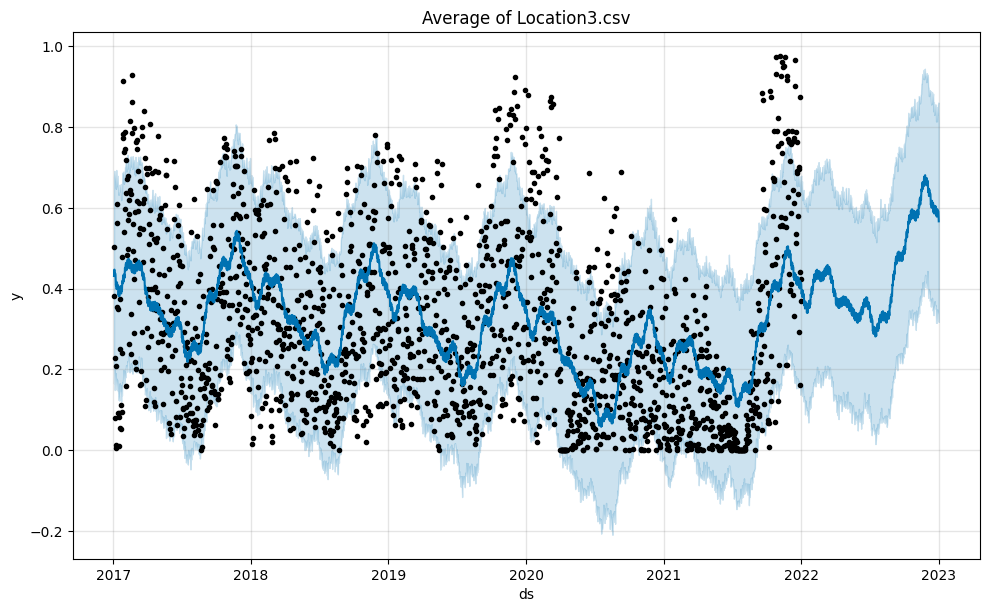

<Figure size 640x480 with 0 Axes>

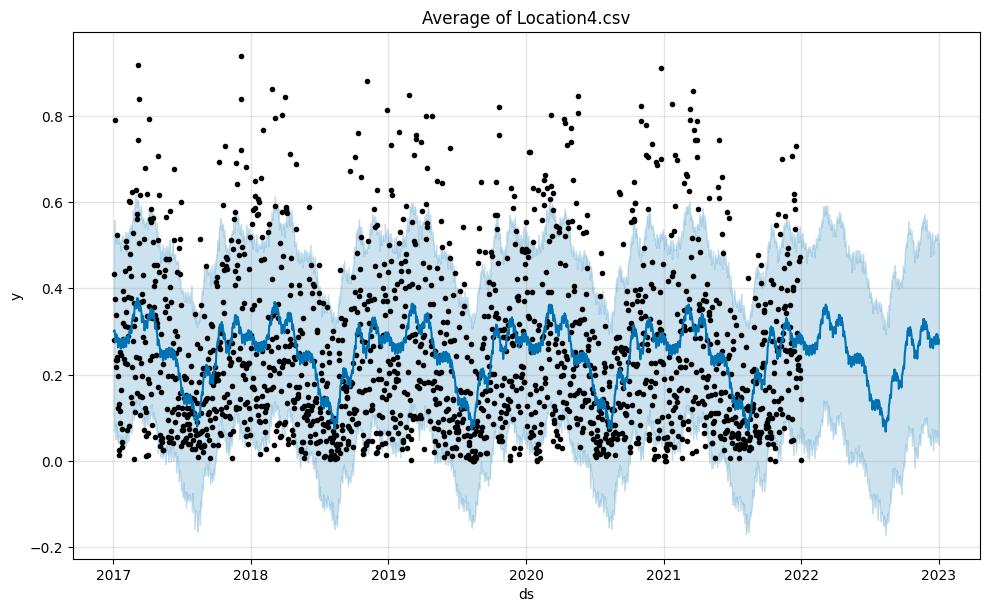

<Figure size 640x480 with 0 Axes>

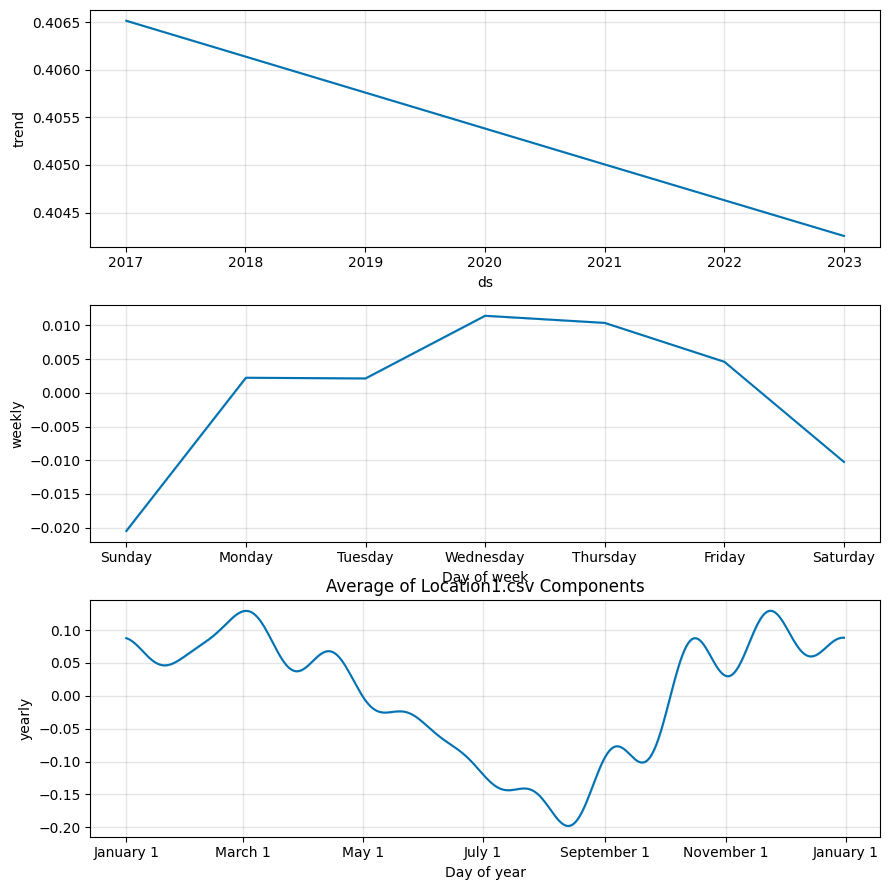

<Figure size 640x480 with 0 Axes>

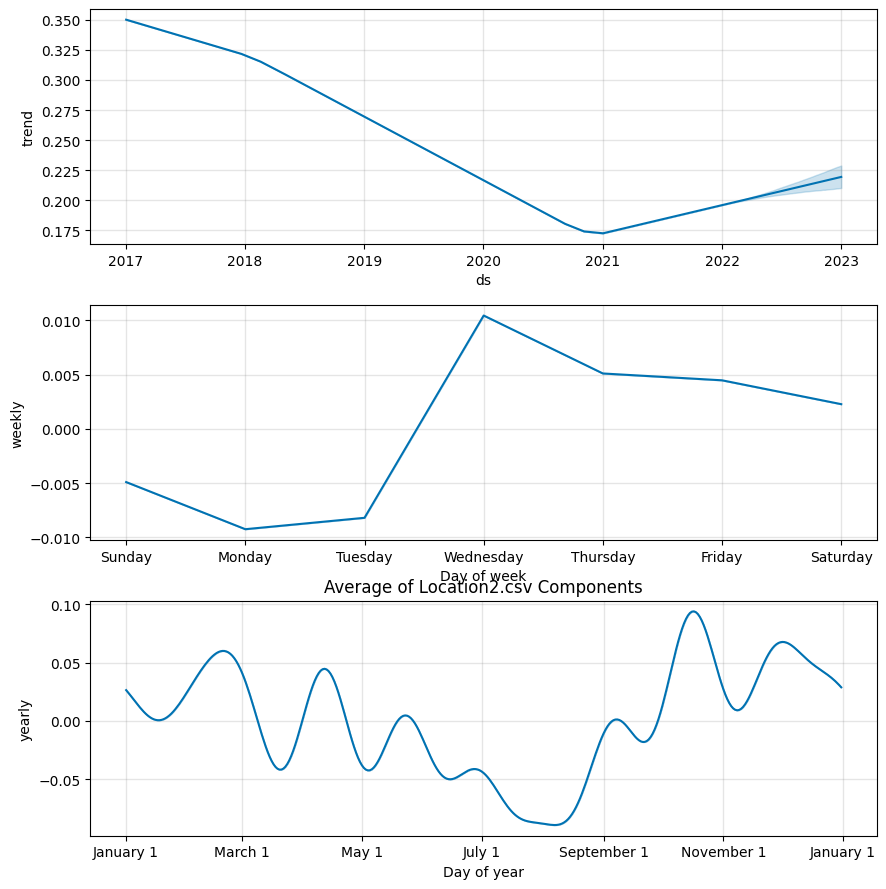

<Figure size 640x480 with 0 Axes>

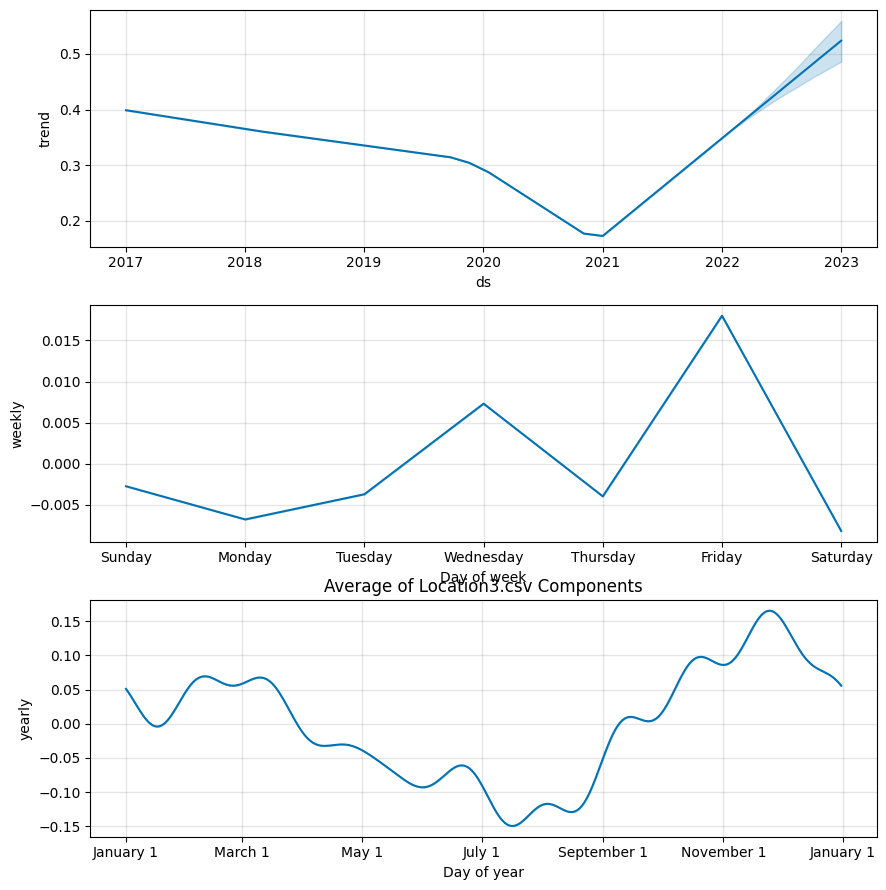

<Figure size 640x480 with 0 Axes>

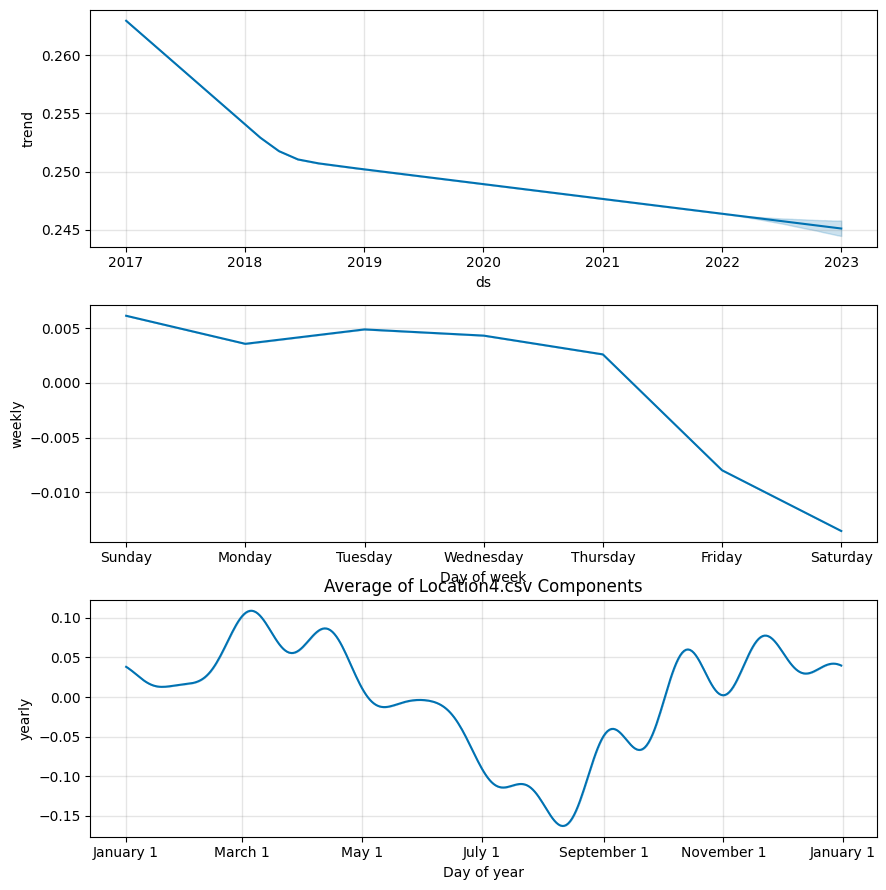

In [11]:
p.plot_prediciton(dict_df_prophet_avg_fit, dict_df_prophet_avg_forecast, 'Average')
p.plot_components(dict_df_prophet_avg_fit, dict_df_prophet_avg_forecast, 'Average')